# MLToolkit Example
Create Date: July 1, 2018; Last Update: July 14, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)
<hr>

### Current release: PyMLToolkit [v0.1.4]

MLToolkit (mltk) is a Python package providing a set of user-friendly functions to help building machine learning models in data science research, teaching or production focused projects. MLToolkit supports all stages of the machine learning application development process.

### Installation
```
pip install pymltoolkit
```
If the installation failed with dependancy issues, execute the above command with --no-dependencies

```
pip install pymltoolkit --no-dependencies
```


# Adult Census Income
## Predict whether income exceeds $50K/yr based on census data.
Source: https://www.kaggle.com/uciml/adult-census-income/home

About this file
Attributes:


<ul>
<li>[age]: continuous</li>
<li>[workclass]: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked</li>
<li>[fnlwgt]: continuous. final weight. In other words, this is the number of people the census believes the entry represents.</li>
<li>[education]: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool</li>
<li>[education-num]: The highest level of education achieved in numerical form. continuous</li>
<li>[marital-status]: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse</li>
<li>[occupation]: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces</li>
<li>[relationship]: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried</li>
<li>[race]: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black</li>
<li>[sex]: Female, Male</li>
<li>[capital-gain]: continuous</li>
<li>[capital-loss]: continuous</li>
<li>[hours-per-week]: continuous</li>
<li>[native-country]: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands</li>
<li>[income]: RESPONSE (">50K", "<=50K") </li>
</ul>

# 1. Load Python libraries

In [1]:
import numpy as np
import pandas as pd
import mltk as mltk
import os
%matplotlib inline

mltk==0.1.4


# 2. Load Dataset

In [2]:
MODEL_SAVE_FOLDER = r'C:\Projects\API\MODELS'

In [3]:
# Load dataset
Data = pd.read_csv(r'C:\Projects\Data\incomedata.csv')
# Clean column names (remove special characters)
Data = mltk.clean_column_names(Data, replace='')
# Add ID column
Data = mltk.add_identity_column(Data, id_label='ID', start=1, increment=1)
Data.head(3)

,ID,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,income
0,1,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,3,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K


# 3. Explore Dataset

## 3.1 Fields, Data Types, Bastic Statistics

In [4]:
# Analyze Response Target
target_source='income'
mltk.variable_frequency(DataFrame=Data, variable=target_source).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
income,,
<=50K,24720,75.9
>50K,7841,24.1
TOTAL,32561,100


In [5]:
# Set Target Valriable
targetVariable = 'HighIncome'
targetCondition = "income=='>50K'" #For Binary Classification

Data=mltk.set_binary_target(Data, target_condition=targetCondition, target_variable=targetVariable)
mltk.variable_frequency(DataFrame=Data, variable=targetVariable).style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
HighIncome,,
0,24720,75.9
1,7841,24.1
TOTAL,32561,100


In [6]:
Data[[targetVariable,target_source]].sample(5)

,HighIncome,income
14616,0,<=50K
29099,0,<=50K
997,0,<=50K
13011,0,<=50K
24300,0,<=50K


In [7]:
# Flag Records to Exclude
excludeCondition="age < 18"
action = 'flag' # 'drop' #
excludeLabel = 'EXCLUDE'
Data=mltk.exclude_records(Data, exclude_ondition=excludeCondition, action=action, exclude_label=excludeLabel) # )#
# Get Dataset stats
Data.sample(3).transpose()

Records age < 18 -> EXCLUDE=1
0 records were excluded


,3208,24026,27513
ID,3209,24027,27514
age,35,53,23
workclass,?,Private,Private
fnlwgt,98080,139671,210474
education,Prof-school,Some-college,Some-college
educationnum,15,10,10
maritalstatus,Never-married,Married-civ-spouse,Never-married
occupation,?,Craft-repair,Other-service
relationship,Not-in-family,Husband,Own-child
race,Asian-Pac-Islander,White,White


In [8]:
DataStats = mltk.data_description(Data)
DataStats

,count,unique,top,freq,mean,std,min,10%,25%,50%,75%,90%,max,dtypes
ID,32561,None,None,None,16281,9399.7,1,3257,8141,16281,24421,29305,32561,int64
age,32561,None,None,None,38.582,13.64,17,22,28,37,48,58,90,int64
workclass,32561,9,Private,22696,None,None,None,None,None,None,None,None,None,object
fnlwgt,32561,None,None,None,1.8978e+05,1.0555e+05,12285,65716,1.1783e+05,1.7836e+05,2.3705e+05,3.2905e+05,1.4847e+06,int64
education,32561,16,HS-grad,10501,None,None,None,None,None,None,None,None,None,object
educationnum,32561,None,None,None,10.081,2.5727,1,7,9,10,12,13,16,int64
maritalstatus,32561,7,Married-civ-spouse,14976,None,None,None,None,None,None,None,None,None,object
occupation,32561,15,Prof-specialty,4140,None,None,None,None,None,None,None,None,None,object
relationship,32561,6,Husband,13193,None,None,None,None,None,None,None,None,None,object
race,32561,5,White,27816,None,None,None,None,None,None,None,None,None,object


## 3.2 Inspect Categorical Variables

In [9]:
sourceVariable='nativecountry'
table = mltk.variable_frequency(Data, variable=sourceVariable, sorted=True, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
nativecountry,,
United-States,29170,89.6
Mexico,643,1.97
?,583,1.79
Philippines,198,0.608
Germany,137,0.421
Canada,121,0.372
Puerto-Rico,114,0.35
El-Salvador,106,0.326
India,100,0.307


In [10]:
sourceVariable='maritalstatus'
table = mltk.variable_frequency(Data, variable=sourceVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married-AF-spouse,23,0.0706
Married-civ-spouse,14976,46
Married-spouse-absent,418,1.28
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


## 3.3 Inspect Continious/Numerical Variables

,counts
age,
"1_[17,24.3]",5570
"2_[24.3,31.6]",5890
"3_[31.6,38.9]",6048
"4_[38.9,46.2]",6163
"5_[46.2,53.5]",3967
"6_[53.5,60.8]",2591
"7_[60.8,68.1]",1595
"8_[68.1,75.4]",496
"9_[75.4,82.7]",174


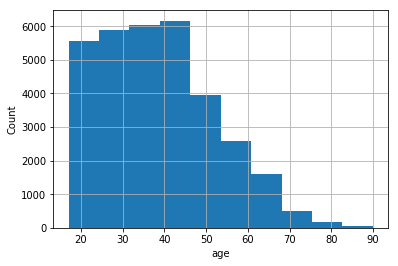

In [11]:
sourceVariable='age'
table = mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)
table.style.background_gradient(cmap='Greens').set_precision(3)

# 4. Creating Feature Variables

## 4.1 Inspect Categorical Variables

In [12]:
categoryVariables = set({'sex', 'nativecountry', 'race', 'occupation', 'workclass', 'maritalstatus', 'relationship'})
binaryVariables = set({})
print(mltk.category_lists(Data, list(categoryVariables)))

{
    "race": [
        "White",
        "Black",
        "Asian-Pac-Islander",
        "Other",
        "Amer-Indian-Eskimo"
    ],
    "sex": [
        "Female",
        "Male"
    ],
    "nativecountry": [
        "United-States",
        "?",
        "Mexico",
        "Greece",
        "Vietnam",
        "China",
        "Taiwan",
        "India",
        "Philippines",
        "Trinadad&Tobago",
        "Canada",
        "South",
        "Holand-Netherlands",
        "Puerto-Rico",
        "Poland",
        "Iran",
        "England",
        "Germany",
        "Italy",
        "Japan",
        "Hong",
        "Honduras",
        "Cuba",
        "Ireland",
        "Cambodia",
        "Peru",
        "Nicaragua",
        "Dominican-Republic",
        "Haiti",
        "El-Salvador",
        "Hungary",
        "Columbia",
        "Guatemala",
        "Jamaica",
        "Ecuador",
        "France",
        "Yugoslavia",
        "Scotland",
        "Portugal",
        "Laos",
        "T

## 4.2 Merge Categories

In [13]:
groups = [{'variable':'maritalstatus', 'group_name':'Married', 'values':["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]}]
Data = mltk.merge_categories(Data, groups)

sourceVariable='maritalstatus'
table = mltk.variable_frequency(Data, variable=sourceVariable, show_plot=False)
table.style.background_gradient(cmap='Greens').set_precision(3)

,Counts,CountsFraction%
maritalstatus,,
Divorced,4443,13.6
Married,15417,47.3
Never-married,10683,32.8
Separated,1025,3.15
Widowed,993,3.05
TOTAL,32561,100


## 4.3 Response Rate For Categorical Variables

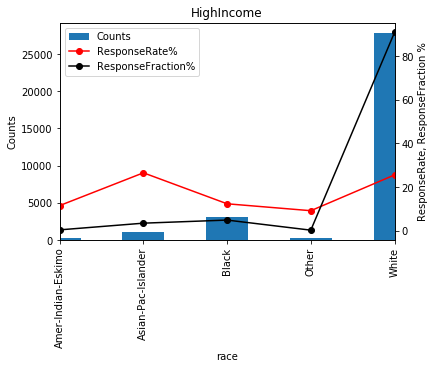

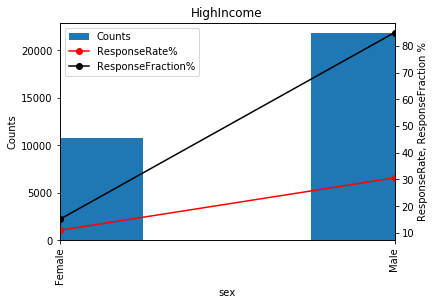

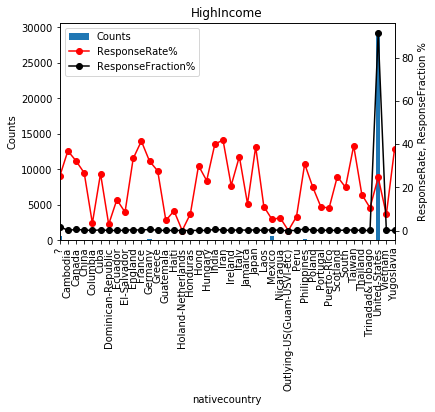

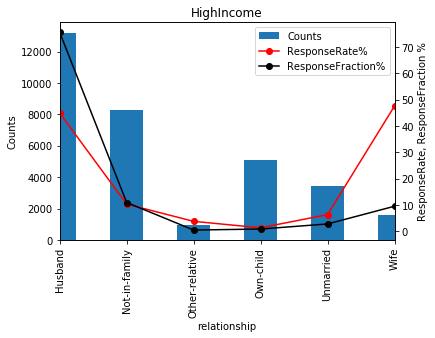

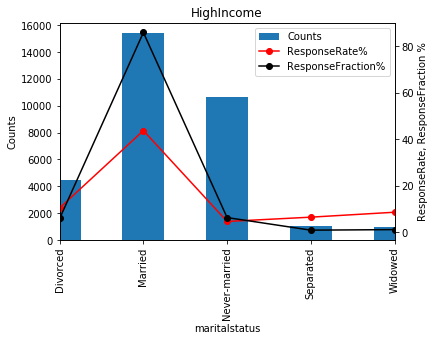

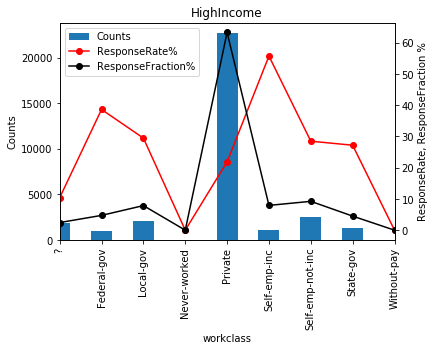

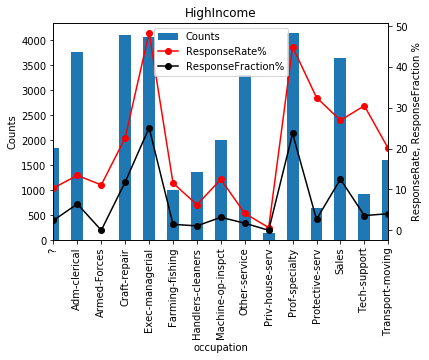

In [14]:
mltk.variable_responses(Data, variables=categoryVariables, target_variable=targetVariable, show_output=False, show_plot=True)

## 4.4 Create Categorical Variables from continious variables

               counts
age                  
1_[17,24.3]      5570
2_[24.3,31.6]    5890
3_[31.6,38.9]    6048
4_[38.9,46.2]    6163
5_[46.2,53.5]    3967
6_[53.5,60.8]    2591
7_[60.8,68.1]    1595
8_[68.1,75.4]     496
9_[75.4,82.7]     174
10_[82.7,90]       67
TOTAL           32561


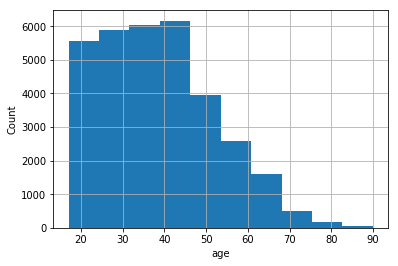

In [15]:
sourceVariable='age'
table = mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)
print(table)

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
ageGRP,,,,,
"1_(0,20]",2410,2,7.40149,0.02551,0.08299
"2_(20,30]",8162,680,25.06680,8.67236,8.33129
"3_(30,40]",8546,2406,26.24612,30.68486,28.15352
"4_(40,50]",6983,2655,21.44590,33.86048,38.02091
"5_(50,60]",4128,1547,12.67774,19.72963,37.47578
"6_(60,INF)",2332,551,7.16194,7.02716,23.62779
TOTAL,32561,7841,100.00000,100.00000,NaN


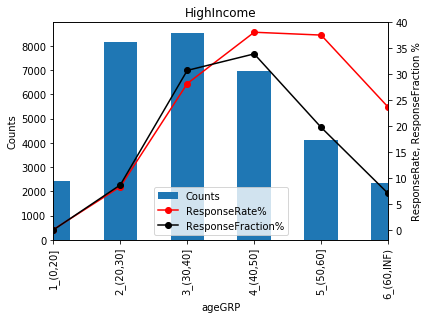

In [16]:
labels = ['0', '20', '30', '40', '50', '60', 'INF']
Data, groupVariable = mltk.numeric_to_category(DataFrame=Data, variable=sourceVariable, str_labels=labels, right_inclusive=True, print_output=False, return_variable=True)
categoryVariables.add(groupVariable)
mltk.variable_response(DataFrame=Data, variable=groupVariable, target_variable=targetVariable, show_plot=True)

,counts
educationnum,
"1_[1,2.5]",219
"2_[2.5,4]",333
"3_[4,5.5]",1160
"4_[5.5,7]",933
"5_[7,8.5]",1608
"6_[8.5,10]",10501
"7_[10,11.5]",8673
"8_[11.5,13]",1067
"9_[13,14.5]",7078


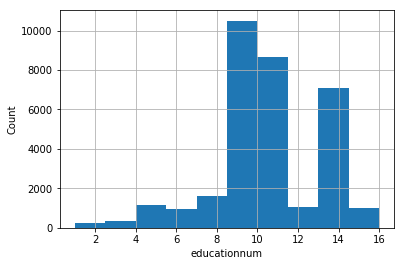

In [17]:
sourceVariable='educationnum'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
educationnumGRP,,,,,
"1_(1,4]",1198,62,3.67925,0.79072,5.17529
"2_(4,6]",1447,89,4.44397,1.13506,6.15066
"3_(6,8]",1608,93,4.93842,1.18607,5.78358
"4_(8,10]",17792,3062,54.64206,39.05114,17.20998
"5_(10,13]",7804,2847,23.96732,36.30914,36.48129
"6_(13,16]",2712,1688,8.32898,21.52787,62.24189
TOTAL,32561,7841,100.00000,100.00000,NaN


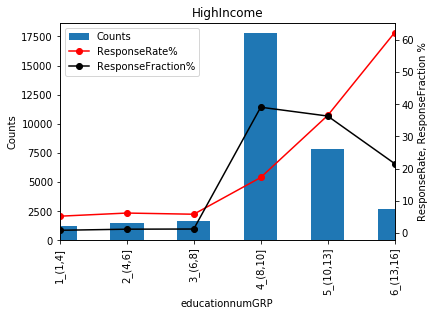

In [18]:
labels = ['1', '4', '6', '8', '10', '13', '16']
Data, groupVariable = mltk.numeric_to_category(DataFrame=Data, variable=sourceVariable, str_labels=labels, right_inclusive=True, print_output=False, return_variable=True)
categoryVariables.add(groupVariable)
mltk.variable_response(DataFrame=Data, variable=groupVariable, target_variable=targetVariable, show_plot=True)

,counts
hoursperweek,
"1_[1,10.8]",736
"2_[10.8,20.6]",2192
"3_[20.6,30.4]",2317
"4_[30.4,40.2]",17735
"5_[40.2,50]",3119
"6_[50,59.8]",3877
"7_[59.8,69.6]",1796
"8_[69.6,79.4]",448
"9_[79.4,89.2]",202


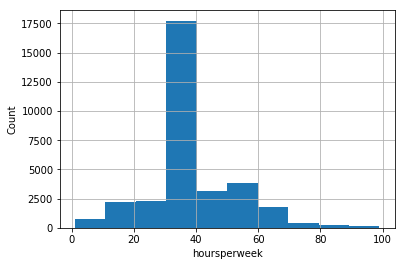

In [19]:
sourceVariable='hoursperweek'
mltk.histogram(Data, sourceVariable, n_bins=10, orientation='vertical', show_plot=True)

,Counts,HighIncome,CountsFraction%,ResponseFraction%,ResponseRate%
hoursperweekGRP,,,,,
"1_(0,20]",2928,195,8.99235,2.48693,6.65984
"2_(20,40]",20052,3790,61.58288,48.33567,18.90086
"3_(40,50]",5938,2352,18.23654,29.99617,39.60930
"4_(50,60]",2533,1100,7.77925,14.02882,43.42677
"5_(60,80]",902,341,2.77019,4.34894,37.80488
"6_(80,INF)",208,63,0.63880,0.80347,30.28846
TOTAL,32561,7841,100.00000,100.00000,NaN


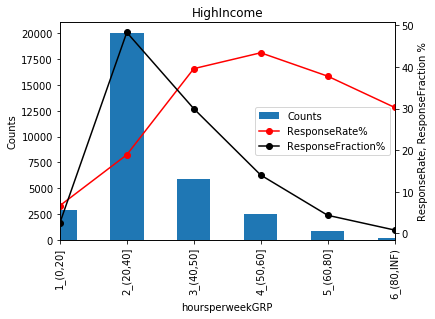

In [20]:
labels = ['0', '20', '40', '50', '60', '80', 'INF']
Data, groupVariable = mltk.numeric_to_category(DataFrame=Data, variable=sourceVariable, str_labels=labels, right_inclusive=True, print_output=False, return_variable=True)
categoryVariables.add(groupVariable)
mltk.variable_response(DataFrame=Data, variable=groupVariable, target_variable=targetVariable, show_plot=True)

# 5. Create Modeling dataset

### Feature/Predictor variables (X) and Response variable (y)

## 5.1 Variables setup

In [21]:
identifierColumns = ['ID']
categoryVariables=list(categoryVariables)
binaryVariables=list(binaryVariables)
targetVariable = targetVariable

In [22]:
Data[identifierColumns+binaryVariables+categoryVariables+[targetVariable]].sample(5).transpose()
#mltk.plot_variable_responses(Data, variables=categoryVariables+binaryVariables, target_variable=targetVariable)

,29118,18117,25847,18958,29412
ID,29119,18118,25848,18959,29413
race,White,Black,White,White,White
nativecountry,United-States,?,United-States,United-States,United-States
maritalstatus,Married,Married,Never-married,Never-married,Married
occupation,Exec-managerial,Transport-moving,Other-service,?,Craft-repair
hoursperweekGRP,"2_(20,40]","2_(20,40]","1_(0,20]","2_(20,40]","2_(20,40]"
educationnumGRP,"4_(8,10]","4_(8,10]","3_(6,8]","4_(8,10]","4_(8,10]"
relationship,Husband,Not-in-family,Own-child,Not-in-family,Husband
sex,Male,Male,Female,Female,Male
ageGRP,"3_(30,40]","3_(30,40]","1_(0,20]","2_(20,30]","5_(50,60]"


## 5.2 Create One Hot Encoded Variables

In [23]:
Data, featureVariables, targetVariable = mltk.to_one_hot_encode(Data, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)
Data[identifierColumns+featureVariables+[targetVariable]].sample(5).transpose()

,31709,25057,9765,28617,19074
ID,31710,25058,9766,28618,19075
race_Amer-Indian-Eskimo,0,0,0,0,0
race_Asian-Pac-Islander,0,0,0,0,0
race_Black,0,0,0,0,0
race_Other,0,0,0,0,0
race_White,1,1,1,1,1
nativecountry_?,0,0,0,0,0
nativecountry_Cambodia,0,0,0,0,0
nativecountry_Canada,0,0,0,0,0
nativecountry_China,0,0,0,0,0


## 5.3 Analyze Correlation

In [24]:
correlation=mltk.correlation_matrix(Data, featureVariables+[targetVariable], target_variable=targetVariable, method='pearson', return_type='list', show_plot=False)
correlation.head(10).style.background_gradient(cmap='RdYlGn').set_precision(3)

,Variable1,Variable2,Correlation,|Correlation|,corrTargetVariable1,corrTargetVariable2
5015,sex_Female,sex_Male,-1,1,-0.216,0.216
3966,occupation_?,workclass_?,0.998,0.998,-0.0786,-0.0782
3750,maritalstatus_Married,relationship_Husband,0.87,0.87,0.435,0.401
202,race_Black,race_White,-0.789,0.789,-0.0891,0.0852
3720,maritalstatus_Married,maritalstatus_Never-married,-0.663,0.663,0.435,-0.318
4826,"educationnumGRP_4_(8,10]","educationnumGRP_5_(10,13]",-0.616,0.616,-0.176,0.163
4590,"hoursperweekGRP_2_(20,40]","hoursperweekGRP_3_(40,50]",-0.598,0.598,-0.153,0.172
4903,relationship_Husband,sex_Female,-0.58,0.58,0.401,-0.216
4904,relationship_Husband,sex_Male,0.58,0.58,0.401,0.216
3802,maritalstatus_Never-married,relationship_Husband,-0.577,0.577,-0.318,0.401


## Split data to train and test datasets

In [25]:
TrainDataset, ValidateDataset, TestDataset = mltk.train_validate_test_split(Data, ratios=(0.6,0.2,0.2))

Train Samples: 19536 [60.0%]
Validate Samples: 6512 [20.0%]
Test Samples: 6513 [20.0%]


# 6. Run classifier algorithms

## 6.1 Model Variables

In [26]:
# Run classifier algorithms
#model_variables = featureVariables
model_variables = [
# 'workclass_?',
 'workclass_Federal-gov',
 'workclass_Local-gov',
# 'workclass_Never-worked',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
# 'workclass_Without-pay',
 'workclass_Private',
 'sex_Female',
# 'sex_Male',
# 'ageGRP_1_(0,20]',
 'ageGRP_2_(20,30]',
 'ageGRP_3_(30,40]',
 'ageGRP_4_(40,50]',
 'ageGRP_5_(50,60]',
# 'ageGRP_6_(60,INF)',
# 'nativecountry_?',
# 'nativecountry_Cambodia',
# 'nativecountry_Canada',
# 'nativecountry_China',
# 'nativecountry_Columbia',
# 'nativecountry_Cuba',
# 'nativecountry_Dominican-Republic',
# 'nativecountry_Ecuador',
# 'nativecountry_El-Salvador',
# 'nativecountry_England',
# 'nativecountry_France',
# 'nativecountry_Germany',
# 'nativecountry_Greece',
# 'nativecountry_Guatemala',
# 'nativecountry_Haiti',
# 'nativecountry_Holand-Netherlands',
# 'nativecountry_Honduras',
# 'nativecountry_Hong',
# 'nativecountry_Hungary',
# 'nativecountry_India',
# 'nativecountry_Iran',
# 'nativecountry_Ireland',
# 'nativecountry_Italy',
# 'nativecountry_Jamaica',
# 'nativecountry_Japan',
# 'nativecountry_Laos',
# 'nativecountry_Mexico',
# 'nativecountry_Nicaragua',
# 'nativecountry_Outlying-US(Guam-USVI-etc)',
# 'nativecountry_Peru',
# 'nativecountry_Philippines',
# 'nativecountry_Poland',
# 'nativecountry_Portugal',
# 'nativecountry_Puerto-Rico',
# 'nativecountry_Scotland',
# 'nativecountry_South',
# 'nativecountry_Taiwan',
# 'nativecountry_Thailand',
# 'nativecountry_Trinadad&Tobago',
# 'nativecountry_United-States',
# 'nativecountry_Vietnam',
# 'nativecountry_Yugoslavia',
 'hoursperweekGRP_1_(0,20]',
 'hoursperweekGRP_2_(20,40]',
 'hoursperweekGRP_3_(40,50]',
 'hoursperweekGRP_4_(50,60]',
# 'hoursperweekGRP_5_(60,80]',
# 'hoursperweekGRP_6_(80,INF)',
# 'occupation_?',
 'occupation_Adm-clerical',
# 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
# 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
# 'occupation_Transport-moving',
 'educationnumGRP_1_(1,4]',
 'educationnumGRP_2_(4,6]',
 'educationnumGRP_3_(6,8]',
 'educationnumGRP_4_(8,10]',
 'educationnumGRP_5_(10,13]',
# 'educationnumGRP_6_(13,16]',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarried',
# 'relationship_Wife',       
 'race_Amer-Indian-Eskimo',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
# 'race_White', 
 'maritalstatus_Divorced',
 'maritalstatus_Married',
# 'maritalstatus_Married-AF-spouse',
# 'maritalstatus_Married-civ-spouse',
# 'maritalstatus_Married-spouse-absent',
 'maritalstatus_Never-married',
 'maritalstatus_Separated',
# 'maritalstatus_Widowed'
 ]

## 6.2 Model Setup

In [27]:
sample_attributes = {'SampleDescription':'Adult Census Income Dataset',
                    'NumClasses':2,
                    'RecordIdentifiers':identifierColumns
                    }

score_parameters = {'Edges':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                   'Quantiles':10,
                   'ScoreVariable':'Probability',
                   'ScoreLabel':'Score',
                   'QuantileLabel':'Quantile'
                   }

model_attributes = {'ModelID': None,   
                   'ModelName': 'IncomeLevel',
                   'Version':'0.1',
                   }

## 6.3 Models

## 6.3.1 Logistic Regression

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELLGR20190714164136', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190714164136', 'ModelFitTime': -1}
{'MLAlgorithm': 'LGR', 'MaxIterations': 100}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.2433968058968059, 'TestResponseRate': 0.2396744971595271}
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile'}
Optimization terminated successfully.
         Current function value: 0.346537
         Iterations 9


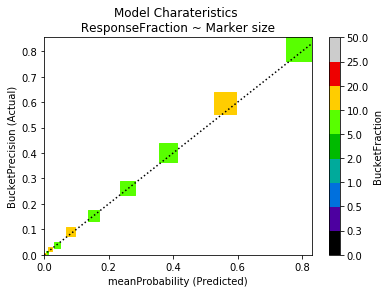

In [28]:
model_parameters = {'MLAlgorithm':'LGR', # 'RF', # 'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'MaxIterations':100}  

LGRModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, model_variables, targetVariable, 
                 model_attributes, sample_attributes, model_parameters, score_parameters, 
                          return_model_object=True, show_results=False, show_plot=True)

In [29]:
print(LGRModel.model_attributes['ModelID'])
print(LGRModel.model_interpretation['ModelSummary'])
print(LGRModel.model_evaluation['AUC'])
#print(LGRModel.model_evaluation['RobustnessTable'])

INCOMELEVELLGR20190714164136
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19536
Model:                          Logit   Df Residuals:                    19492
Method:                           MLE   Df Model:                           43
Date:                Sun, 14 Jul 2019   Pseudo R-squ.:                  0.3716
Time:                        16:41:36   Log-Likelihood:                -6770.0
converged:                       True   LL-Null:                       -10773.
                                        LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
workclass_Federal-gov            0.9024      0.189      4.772      0.000       0.532       1.273
workclass_Local-gov              0.0756      0.1

In [30]:
LGRModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0.000357,0.00532,0.00303,653,3,0.1,0.00192,0.00459,1,1,0.24
2,0.00534,0.0125,0.00876,650,6,0.0998,0.00384,0.00923,0.9,0.998,0.266
3,0.0125,0.0257,0.0188,653,15,0.1,0.00961,0.023,0.8,0.994,0.298
4,0.0257,0.0552,0.0393,649,25,0.0996,0.016,0.0385,0.7,0.985,0.337
5,0.0553,0.112,0.0811,653,59,0.1,0.0378,0.0904,0.6,0.969,0.387
6,0.112,0.201,0.153,650,101,0.0998,0.0647,0.155,0.5,0.931,0.446
7,0.201,0.315,0.258,651,171,0.1,0.11,0.263,0.4,0.866,0.519
8,0.315,0.464,0.384,651,262,0.1,0.168,0.402,0.3,0.757,0.604
9,0.464,0.677,0.561,652,389,0.1,0.249,0.597,0.2,0.589,0.705


## 6.3.2 Random Forest Classifier

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELRF20190714164137', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190714164137', 'ModelFitTime': -1}
{'MLAlgorithm': 'RF', 'NTrees': 500, 'MaxDepth': 200, 'MinSamplesToSplit': 10, 'Processors': 2}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.2433968058968059, 'TestResponseRate': 0.2396744971595271}
{'Edges': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'Quantiles': 10, 'ScoreVariable': 'Probability', 'ScoreLabel': 'Score', 'QuantileLabel': 'Quantile'}


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    1.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    5.2s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    5.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.3s finished


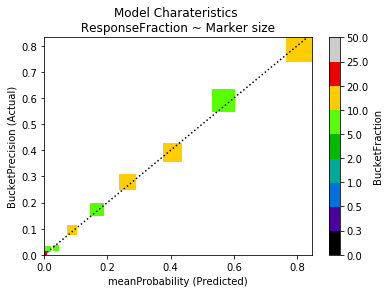

In [31]:
model_parameters = {'MLAlgorithm':'RF', # 'LGR', #  'DFF', # 'CNN', # 'CATBST', # 'XGBST'
                    'NTrees':500,
                   'MaxDepth':200,
                   'MinSamplesToSplit':10,
                   'Processors':2} 

RFModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, model_variables, targetVariable, 
                 model_attributes, sample_attributes, model_parameters, score_parameters, 
                          return_model_object=True, show_results=False, show_plot=True)

In [32]:
print(RFModel.model_attributes['ModelID'])
print(RFModel.model_interpretation['ModelSummary'])
print(RFModel.model_evaluation['AUC'])
#print(RFModel.model_evaluation['RobustnessTable'])

INCOMELEVELRF20190714164137
                        Features  Importances    stdev
41         maritalstatus_Married      0.13815  0.12243
31          relationship_Husband      0.09547  0.10555
17    occupation_Exec-managerial      0.05719  0.01997
22     occupation_Prof-specialty      0.05541  0.01856
42   maritalstatus_Never-married      0.04959  0.06634
29      educationnumGRP_4_(8,10]      0.04096  0.01168
30     educationnumGRP_5_(10,13]      0.03523  0.01297
7               ageGRP_2_(20,30]      0.03497  0.01822
32    relationship_Not-in-family      0.02613  0.02430
6                     sex_Female      0.02505  0.02202
12     hoursperweekGRP_2_(20,40]      0.02410  0.00732
34        relationship_Own-child      0.02354  0.03451
9               ageGRP_4_(40,50]      0.02262  0.00869
13     hoursperweekGRP_3_(40,50]      0.02051  0.00837
3     workclass_Self-emp-not-inc      0.01968  0.00395
26       educationnumGRP_1_(1,4]      0.01945  0.00946
5              workclass_Private     

In [33]:
RFModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,0,0.00384,0.000638,1303,11,0.2,0.00705,0.00844,1,1,0.24
2,0.00394,0.0202,0.0108,651,16,0.1,0.0102,0.0246,0.8,0.993,0.298
3,0.0202,0.0562,0.0365,651,19,0.1,0.0122,0.0292,0.7,0.983,0.336
4,0.0562,0.121,0.0872,653,64,0.1,0.041,0.098,0.6,0.971,0.388
5,0.121,0.208,0.166,650,113,0.0998,0.0724,0.174,0.5,0.93,0.446
6,0.208,0.319,0.262,652,183,0.1,0.117,0.281,0.4,0.857,0.514
7,0.319,0.469,0.404,662,260,0.102,0.167,0.393,0.3,0.74,0.591
8,0.47,0.667,0.567,639,378,0.0981,0.242,0.592,0.198,0.573,0.693
9,0.667,0.999,0.807,652,517,0.1,0.331,0.793,0.1,0.331,0.793


## 6.3.3 Deep Feed Forward Neural Network

In [34]:
inputShape = (len(model_variables),)
architecture = {
        'L1':{'type': 'Dense', 'position':'input', 'units': 512, 'activation':'relu', 'input_shape':inputShape},
        'L2':{'type': 'Dense', 'position':'hidden', 'units': 512, 'activation':'relu'},
        'L3':{'type': 'Dropout', 'position':'hidden', 'rate':0.5},
        'L4':{'type': 'Dense', 'position':'output', 'units': 2, 'activation':'softmax', 'output_shape':None},
       }

Train samples: 19536 loded...
Validate samples: 6512 loded...
Test samples: 6513 loded...
{'ModelID': 'INCOMELEVELNN20190714164144', 'ModelName': 'IncomeLevel', 'Version': '0.1', 'BuiltTime': '20190714164144', 'ModelFitTime': -1}
{'MLAlgorithm': 'NN', 'BatchSize': 512, 'InputShape': (44,), 'num_classes': 2, 'Epochs': 10, 'metrics': ['accuracy'], 'architecture': {'L1': {'type': 'Dense', 'position': 'input', 'units': 512, 'activation': 'relu', 'input_shape': (44,)}, 'L2': {'type': 'Dense', 'position': 'hidden', 'units': 512, 'activation': 'relu'}, 'L3': {'type': 'Dropout', 'position': 'hidden', 'rate': 0.5}, 'L4': {'type': 'Dense', 'position': 'output', 'units': 2, 'activation': 'softmax', 'output_shape': None}}}
{'SampleDescription': 'Adult Census Income Dataset', 'NumClasses': 2, 'RecordIdentifiers': ['ID'], 'TrainSize': 19536, 'ValidateSize': 6512, 'TestSize': 6513, 'TrainValidateTestRatio': '[0.6 0.2 0.2]', 'TrainResponseRate': 0.24032555282555282, 'ValidateResponseRate': 0.243396805

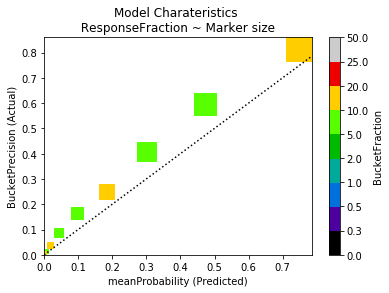

In [35]:
model_parameters = {'MLAlgorithm':'NN',
                    'BatchSize':512,
                   'InputShape':inputShape,
                   'num_classes':2,
                   'Epochs':10,
                   'metrics':['accuracy'],
                   'architecture':architecture} 

NNModel = mltk.build_ml_model(TrainDataset, ValidateDataset, TestDataset, model_variables, targetVariable, 
                 model_attributes, sample_attributes, model_parameters, score_parameters, 
                          return_model_object=True, show_results=False, show_plot=True)

In [36]:
print(NNModel.model_attributes['ModelID'])
print(NNModel.model_interpretation['ModelSummary'])
print(NNModel.model_evaluation['AUC'])
#print(NNModel.model_evaluation['RobustnessTable'])

INCOMELEVELNN20190714164144
      loss      acc  val_loss  val_acc
0  0.40797  0.80047   0.42358  0.80329
1  0.36084  0.82898   0.36787  0.82356
2  0.35563  0.83098   0.37260  0.82248
3  0.34939  0.83548   0.36125  0.82724
4  0.34655  0.83569   0.36156  0.82647
5  0.34353  0.83850   0.35766  0.82955
6  0.34213  0.83983   0.36003  0.82970
7  0.34053  0.83753   0.36086  0.82571
8  0.34049  0.83973   0.35775  0.82832
9  0.33764  0.84214   0.37447  0.82356
0.8919815365238511


In [37]:
NNModel.model_evaluation['RobustnessTable'].style.background_gradient(cmap='RdYlGn').set_precision(3)

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Quantile,,,,,,,,,,,
1,5.33e-05,0.00125,0.000654,653,2,0.1,0.00128,0.00306,1,1,0.24
2,0.00126,0.00371,0.00232,657,7,0.101,0.00448,0.0107,0.9,0.999,0.266
3,0.00371,0.00952,0.00623,644,10,0.0989,0.00641,0.0155,0.799,0.994,0.298
4,0.00952,0.0245,0.0164,652,25,0.1,0.016,0.0383,0.7,0.988,0.338
5,0.0246,0.0629,0.042,651,58,0.1,0.0372,0.0891,0.6,0.972,0.388
6,0.063,0.135,0.0977,651,108,0.1,0.0692,0.166,0.5,0.935,0.448
7,0.136,0.241,0.183,652,163,0.1,0.104,0.25,0.4,0.865,0.519
8,0.241,0.368,0.301,651,266,0.1,0.17,0.409,0.3,0.761,0.608
9,0.368,0.601,0.472,650,388,0.0998,0.249,0.597,0.2,0.591,0.708


## 7. Model Evaluation (Performance Comparison)

### 7.1 ROC Curve, True Positive Rate (TPR) vs.False Positive Rate (FPR)
#### References
* T. Fawcett, An introduction to ROC analysis, Pattern Recognition Letters, Volume 27, Issue 8, June 2006, Pages 861-874. doi.org/10.1016/j.patrec.2005.10.010. 
* sklearn.metrics.roc_curve, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

Using matplotlib backend: Qt5Agg


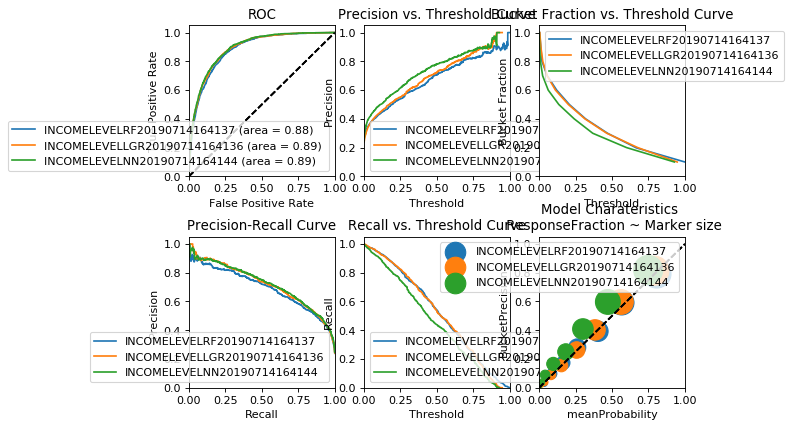

In [38]:
%matplotlib auto

RFModel.plot_eval_matrics(comparison=True)
LGRModel.plot_eval_matrics(comparison=True)
NNModel.plot_eval_matrics(comparison=True)

### 7.2 Generate scores

,minProbability,maxProbability,meanProbability,BucketCount,ResponseCount,BucketFraction,ResponseFraction,BucketPrecision,CumulativeBucketFraction,CumulativeResponseFraction,CumulativePrecision
Score,,,,,,,,,,,
1,0.000357,0.1,0.0275,3148,92,0.483,0.0589,0.0292,1,1,0.24
2,0.1,0.2,0.146,758,117,0.116,0.075,0.154,0.517,0.941,0.437
3,0.2,0.3,0.251,572,146,0.0878,0.0935,0.255,0.4,0.866,0.519
4,0.3,0.4,0.348,477,175,0.0732,0.112,0.367,0.312,0.773,0.593
5,0.4,0.5,0.45,427,209,0.0656,0.134,0.489,0.239,0.66,0.662
6,0.501,0.599,0.553,282,157,0.0433,0.101,0.557,0.174,0.527,0.727
7,0.601,0.7,0.654,286,198,0.0439,0.127,0.692,0.13,0.426,0.783
8,0.7,0.799,0.752,275,210,0.0422,0.135,0.764,0.0864,0.299,0.829
9,0.801,0.9,0.847,238,209,0.0365,0.134,0.878,0.0442,0.165,0.892


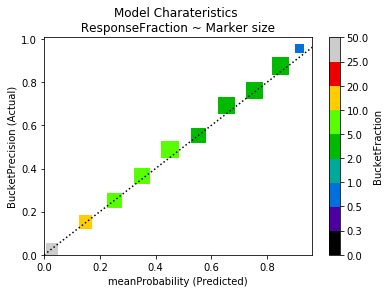

In [39]:
score_variable = LGRModel.get_score_variable()
score_label = LGRModel.get_score_label()

TestDataset = mltk.score_processed_dataset(TestDataset, LGRModel, edges=None, score_label=None, fill_missing=0)
Robustnesstable = mltk.robustness_table(ResultsSet=TestDataset, target_variable=targetVariable, score_variable=score_variable,  score_label=score_label, show_plot=True)
Robustnesstable.style.background_gradient(cmap='RdYlGn').set_precision(3)

### 7.3 Confusion Matrix [actual, predicted]

### Confusion Matrix Terms
#### For a Binary Classifier
* TN= CF[0,0], FP= CF[0,1], FN= CF[1,0], TP= CF[1,1]
* Accuracy (ACC) = (TP+TN)/TOTAL
* Hit Rate, Sensitivity, Recall or True Positive Rate (TPR) = TP/(TP+FN)
* False Positive Rate (FPR) = FP/(FP+TN) 
* Specificity or True Negative Rate (TNR) = TN/(FP+TN)
* Miss Rate or False Negative rate (FNR) = FN/(FN+TP) 
* Positive Predictive Value or Precision (PPV) = TP/(TP+FP) 
* Harmonic Mean of Precision and Sensitivity or F1 score (F1) = 2TP/(2TP+FP+FN)

#### For a Multi-class Classifier
* TPS = Diagonal(CF)
* SUCCESS = Sum(TPS)
* Sum of Actual Conditions (ASUM) = RowSum(CF)
* Sum of Predicted conditions (PSUM) = ColumnsSum(CF)
* Positive Predictive Value or Precision for Class i (PPV[i]) = TPS[i]/PSUM
* Hit Rate, Sensitivity, Recall or True Positive Rate for Class i (TPR[i]) = TPS[i]/ASUM

##### References: 
* C. Beleites, R. Salzer, V. Sergo, Validation of soft classification models using partial class memberships: An extended concept of sensitivity & co. applied to grading of astrocytoma tissues, Chemometrics and Intelligent Laboratory Systems Volume 122, 15 March 2013, Pages 12-22. doi.org/10.1016/j.chemolab.2012.12.003.
* sklearn.metrics.confusion_matrix, http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
* Confusion Matrix, http://www2.cs.uregina.ca/~dbd/cs831/notes/ROC/ROC.html.




In [40]:
score_variable = LGRModel.get_score_variable()
score_label = LGRModel.get_score_label()

threshold = 0.8
TestDataset = mltk.set_predicted_columns(TestDataset, score_variable, threshold=threshold)
ConfusionMatrix = mltk.confusion_matrix(TestDataset, actual_variable=targetVariable, predcted_variable='Predicted', labels=[0,1], sample_weight=None, totals=True)
ConfusionMatrix.style.background_gradient(cmap='Greens').set_precision(3)  

### 7.3 Comparison of Models and Thresholds

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.4s finished


6513/6513 [==============================] - 0s 8us/sample


,ModelID,TN,FP,FN,TP,TOTAL,P1,P0,A1,A0,TPR,TNR,FPR,FNR,PPV,ACC,F1
0,INCOMELEVELLGR20190714164136_[TH=0.7],4856,96,1094,467,6513,563,5950,1561,4952,0.299,0.981,0.0194,0.701,0.829,0.817,0.44
1,INCOMELEVELLGR20190714164136_[TH=0.8],4921,31,1304,257,6513,288,6225,1561,4952,0.165,0.994,0.00626,0.835,0.892,0.795,0.278
2,INCOMELEVELLGR20190714164136_[TH=0.9],4950,2,1513,48,6513,50,6463,1561,4952,0.0307,1,0.000404,0.969,0.96,0.767,0.0596
3,INCOMELEVELRF20190714164137_[TH=0.7],4846,106,1102,459,6513,565,5948,1561,4952,0.294,0.979,0.0214,0.706,0.812,0.815,0.432
4,INCOMELEVELRF20190714164137_[TH=0.8],4898,54,1296,265,6513,319,6194,1561,4952,0.17,0.989,0.0109,0.83,0.831,0.793,0.282
5,INCOMELEVELRF20190714164137_[TH=0.9],4940,12,1447,114,6513,126,6387,1561,4952,0.073,0.998,0.00242,0.927,0.905,0.776,0.135
6,INCOMELEVELNN20190714164144_[TH=0.7],4896,56,1212,349,6513,405,6108,1561,4952,0.224,0.989,0.0113,0.776,0.862,0.805,0.355
7,INCOMELEVELNN20190714164144_[TH=0.8],4929,23,1376,185,6513,208,6305,1561,4952,0.119,0.995,0.00464,0.881,0.889,0.785,0.209
8,INCOMELEVELNN20190714164144_[TH=0.9],4951,1,1529,32,6513,33,6480,1561,4952,0.0205,1,0.000202,0.98,0.97,0.765,0.0402


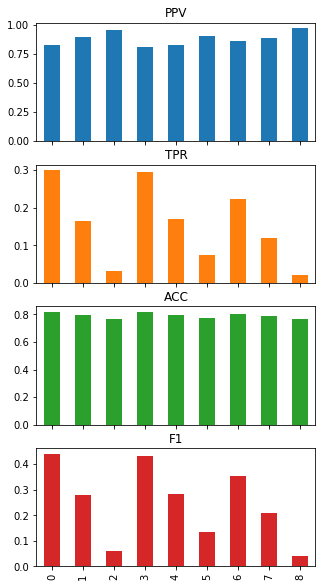

In [41]:
Models = [LGRModel, RFModel, NNModel]
thresholds=[0.7, 0.8, 0.9]
ConfusionMatrixComparison = mltk.confusion_matrix_comparison(TestDataset, Models, thresholds, score_variable=None, show_plot=True)
ConfusionMatrixComparison.style.background_gradient(cmap='RdYlGn').set_precision(3)


### 7.4 Set Custon Score Edges

In [42]:
edges = [0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.95, 1.0]
LGRModel.set_score_edges(edges)

### 7.5 Save Models

In [43]:
saveFilePath = '{}.pkl'.format(LGRModel.get_model_id())
mltk.save_model(LGRModel, saveFilePath)

Saving model to file INCOMELEVELLGR20190714164136.pkl


# 8. Generate Predicted Value (Score)

### 8.1 Define ETL Function

In [44]:
def ETL(DataFrame):
    # Add ID column
    DataFrame = mltk.add_identity_column(DataFrame, id_label='ID', start=1, increment=1)
    
    # Clean column names
    DataFrame = mltk.clean_column_names(DataFrame, replace='')
    input_columns = list(DataFrame.columns)

    # Excising valiables to model
    targetVariable = 'HighIncome'
    categoryVariables = ['sex', 'nativecountry', 'race', 'occupation', 'workclass', 'maritalstatus', 'relationship']
    binaryVariables = []
    
    # List to Create more Binary variables
    conditions = [{'bin_variable':'CapitalGainPositive', 'str_condition':"capitalgain>0"},
                  {'bin_variable':'CapitalLossPositive', 'str_condition':"capitalloss>0"}
                  ]
    
    # List to Create more Catergorical variables
    buckets = [{'variable':'age', 'str_labels':['0', '20', '30', '40', '50', '60', 'INF']},
               {'variable':'educationnum', 'str_labels':['1', '4', '6', '8', '10', '13', '16']},
               {'variable':'hoursperweek', 'str_labels':['0', '20', '40', '50', '60', '80', 'INF']}
              ] 
    
    # List to Merge categorical values
    groups = [{'variable':'maritalstatus', 'group_name':'Married', 'values':["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]}]
    
    DataFrame, categoryVariables, binaryVariables, targetVariable = mltk.setup_variables(DataFrame, target_variable=targetVariable, category_variables=categoryVariables, binary_variables=binaryVariables, conditions=conditions, buckets=buckets, groups=groups)
    
    # Create One Hot Encoded Variables
    DataFrame, featureVariables, targetVariable = mltk.to_one_hot_encode(DataFrame, category_variables=categoryVariables, binary_variables=binaryVariables, target_variable=targetVariable)

    return DataFrame, input_columns

### 8.2 Load Model Object and Input Data

In [45]:
MLModelObject = mltk.load_model(saveFilePath)

TestInput = """
{
      "ID": "A001",
      "age": 32,
      "workclass": "Private",
      "education": "Doctorate",
      "education-num": 16,
      "marital-status": "Married-civ-spouse",
      "occupation": "Prof-specialty",
      "relationship": "Husband",
      "race": "Asian-Pac-Islander",
      "sex": "Male",
      "capital-gain": 0,
      "capital-loss": 0,
      "hours-per-week": 40,
      "native-country": "?"
}
"""

Loading model from file INCOMELEVELLGR20190714164136.pkl


### 8.3 Generate Scores

In [46]:
output = mltk.score_records(TestInput, MLModelObject, edges=None, ETL=ETL, return_type='dict') # Other options for return_type, {'json', 'frame'}
output

Column ID exists in the DataFrame


[{'ID': 'A001',
  'age': 32,
  'capitalgain': 0,
  'capitalloss': 0,
  'education': 'Doctorate',
  'educationnum': 16,
  'hoursperweek': 40,
  'maritalstatus': 'Married',
  'nativecountry': '?',
  'occupation': 'Prof-specialty',
  'race': 'Asian-Pac-Islander',
  'relationship': 'Husband',
  'sex': 'Male',
  'workclass': 'Private',
  'Probability': 0.7494862543903595,
  'Score': 8}]

This notebook and related materials were developed by Sumudu Tennakoon to demostrate the MLToolkit python library and its interoperability with the standared Python data analysis and machine learning packages (e.g. Pandas, Sci-kitlearn, Statsmodel, etc.)
Create Date: July 01, 2018; Last Update: July 14, 2019. 
Apache License, Version 2.0 (http://www.apache.org/licenses/LICENSE-2.0)